<a href="https://colab.research.google.com/github/riyamendon99/CSE575-SML-Riya-Mendon/blob/main/HW3_RiyaMendon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NAME: RIYA MENDON ASU ID: 1229584722***

***Answer to Question 1***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/pca_data.npz')

In [ ]:
%pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
import numpy as np
loaded_data = np.load('/content/drive/MyDrive/pca_data.npz')

In [ ]:
matrix = np.array(loaded_data['data'])
print(matrix)

[[ 4.28762104  3.98699268]
 [ 3.87252894  3.84446188]
 [ 3.16137736  4.11568308]
 [ 3.36643168  4.01930949]
 [ 3.86643159  4.80530944]
 [ 5.00946348  5.25755869]
 [ 6.02686275  6.33166216]
 [ 6.10860911  5.96837974]
 [ 4.0724175   4.05200989]
 [ 7.79570446  6.81499018]
 [ 4.32791399  5.7598386 ]
 [ 5.47933796  5.23489139]
 [ 6.1236617   5.57197815]
 [ 6.01725949  5.17366886]
 [ 5.81756189  5.76132376]
 [ 4.36523239  4.39393147]
 [ 6.3555497   5.2563791 ]
 [ 6.76144907  4.71715829]
 [ 5.6387901   5.8121668 ]
 [ 4.94791811  4.86335185]
 [ 5.53278761  5.60577971]
 [ 2.47989611  4.24126124]
 [ 4.25923768  3.99873625]
 [ 5.40020612  4.92258544]
 [ 7.02743922  5.99076253]
 [ 6.31389283  6.38268354]
 [ 3.81275715  4.82540238]
 [ 7.14166719  5.90273654]
 [ 8.95345217  7.72855447]
 [ 2.93818776  4.58352273]
 [ 2.94955481  4.9481056 ]
 [ 5.42141864  5.71582363]
 [ 4.52985399  5.23470701]
 [ 6.55508709  5.63880602]
 [ 4.18740285  3.9364161 ]
 [ 3.5762598   2.68031313]
 [ 5.34792428  4.83374181]
 

In [ ]:
matrix.data.shape

(300, 2)

***Answer to Question 2***

In [ ]:
#Using scikit-learn to compute principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matrix)
print(pca.components_)

[[-0.83774478 -0.54606197]
 [-0.54606197  0.83774478]]


***Answer to Question 3***

In [ ]:
#Implementing PCA without using sckilit-learn
mean = np.mean(matrix)
#Centering the data towards the mean
data_at_origin = matrix-mean
#Computing the covariance matrix
covariance_matrix = np.cov(data_at_origin.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Values\n", eigen_values)
print("Eigen Vectors\n",eigen_vectors)

Eigen Values
 [2.48467365 0.40390296]
Eigen Vectors
 [[ 0.83774478 -0.54606197]
 [ 0.54606197  0.83774478]]


In [ ]:
#Making an eigen value and eigen vector pair
eigen_tuple = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

print(eigen_tuple)

#Sorting the eigen values in decreasing order
eigen_tuple.sort(key=lambda x: x[0], reverse=True)
for i in eigen_tuple:
  print(i[0])

[(2.4846736473790276, array([0.83774478, 0.54606197])), (0.4039029591764164, array([-0.54606197,  0.83774478]))]
2.4846736473790276
0.4039029591764164


In [ ]:
#Calculating the variance of each pricipal component
total = sum(eigen_values)
variance = [(i/total)*100 for i in sorted(eigen_values, reverse=True)]
print(variance)

[86.01723221534841, 13.982767784651578]


In [ ]:
n_components = 2
pcas = np.array([eigen_tuple[i][1] for i in range(n_components)])
print("Pricipal Components are\n", pcas)

Pricipal Components are
 [[ 0.83774478  0.54606197]
 [-0.54606197  0.83774478]]


***Answer to Question 4***

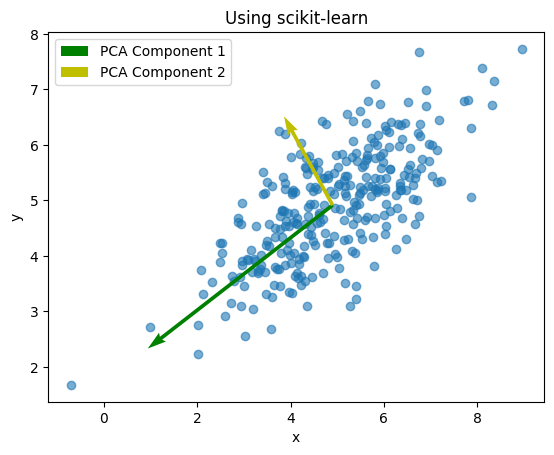

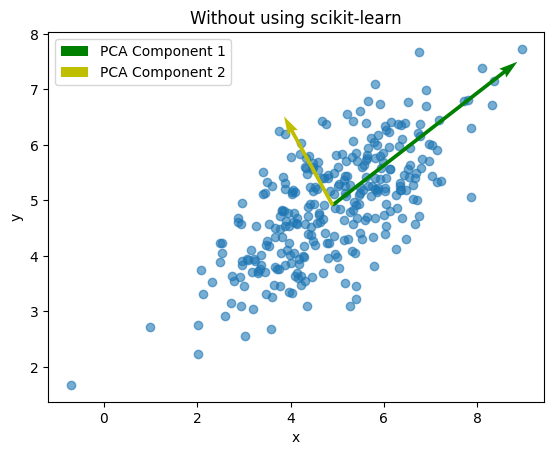

In [ ]:
import matplotlib.pyplot as plt
def plot(data, pca_components,explained_variance, title):
  #Creating a scatter plot of the data
  plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
  mean = np.mean(data, axis=0)
  for length, vector in zip(explained_variance, pca_components):
    #Scaling the vector
    v = vector * 3 * np.sqrt(length)
    i=np.where(pca_components==vector)[0][0]
    #Using "quiver" to plot the vector on scatter plot
    plt.quiver(mean[0], mean[1], v[0], v[1], angles='xy', scale_units='xy', scale=1,color=['g', 'y'][i], label=f"PCA Component {i+1}")
  #Adding legend to the plot for showing labels different components
  plt.legend()
  #Adding the title passed to the function
  plt.title(title)
  #Adding labels to x and y axis
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

#Calling the function "plot" for both with and without using scikit-learn
plot(matrix, pca.components_,pca.explained_variance_,'Using scikit-learn')
plot(matrix, pcas,eigen_values,'Without using scikit-learn')